In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
from data import *
from Prim import Prim
from pqueue import PriorityQueue
from find_min_perfect_matching import *
from shortcutting import *
import networkx.algorithms.approximation as nx_app
import math
import time

In [3]:
def make_graph_from_matrix(A):
    G=nx.from_numpy_array(np.matrix(A)) 
    return G

In [87]:
A5 = [
    [0.0,  3.0,  4.0,  2.0,  7.0],
    [3.0,  0.0,  4.0,  6.0,  3.0],
    [4.0,  4.0,  0.0,  5.0,  8.0],
    [2.0,  6.0,  5.0,  0.0,  6.0],
    [7.0,  3.0,  8.0,  6.0,  0.0]]

A15 =  [[0, 29, 82, 46, 68, 52, 72, 42, 51, 55, 29, 74, 23, 72, 46],
        [29, 0, 55, 46, 42, 43, 43, 23, 23, 31, 41, 51, 11, 52, 21],
        [82, 55, 0, 68, 46, 55, 23, 43, 41, 29, 79, 21, 64, 31, 51],
        [46, 46, 68, 0, 82, 15, 72, 31, 62, 42, 21, 51, 51, 43, 64],
        [68, 42, 46, 82, 0, 74, 23, 52, 21, 46, 82, 58, 46, 65, 23],
        [52, 43, 55, 15, 74, 0, 61, 23, 55, 31, 33, 37, 51, 29, 59],
        [72, 43, 23, 72, 23, 61, 0, 42, 23, 31, 77, 37, 51, 46, 33],
        [42, 23, 43, 31, 52, 23, 42, 0, 33, 15, 37, 33, 33, 31, 37],
        [51, 23, 41, 62, 21, 55, 23, 33, 0, 29, 62, 46, 29, 51, 11],
        [55, 31, 29, 42, 46, 31, 31, 15, 29, 0, 51, 21, 41, 23, 37],
        [29, 41, 79, 21, 82, 33, 77, 37, 62, 51, 0, 65, 42, 59, 61],
        [74, 51, 21, 51, 58, 37, 37, 33, 46, 21, 65, 0, 61, 11, 55],
        [23, 11, 64, 51, 46, 51, 51, 33, 29, 41, 42, 61, 0, 62, 23],
        [72, 52, 31, 43, 65, 29, 46, 31, 51, 23, 59, 11, 62, 0, 59],
        [46, 21, 51, 64, 23, 59, 33, 37, 11, 37, 61, 55, 23, 59, 0]]
    
A17 =   [[  0, 633, 257,  91, 412, 150,  80, 134, 259, 505, 353, 324,  70, 211, 268, 246, 121],
        [633,   0, 390, 661, 227, 488, 572, 530, 555, 289, 282, 638, 567, 466, 420, 745, 518],
        [257, 390,   0, 228, 169, 112, 196, 154, 372, 262, 110, 437, 191,  74,  53, 472, 142],
        [ 91, 661, 228,   0, 383, 120,  77, 105, 175, 476, 324, 240,  27, 182, 239, 237,  84],
        [412, 227, 169, 383,   0, 267, 351, 309, 338, 196,  61, 421, 346, 243, 199, 528, 297],
        [150, 488, 112, 120, 267,   0,  63,  34, 264, 360, 208, 329,  83, 105, 123, 364,  35],
        [ 80, 572, 196,  77, 351,  63,   0,   29, 232, 444, 292, 297,  47, 150, 207, 332,  29],
        [134, 530, 154, 105, 309,  34,  29,   0, 249, 402, 250, 314,  68, 108, 165, 349,  36],
        [259, 555, 372, 175, 338, 264, 232, 249,   0, 495, 352,  95, 189, 326, 383, 202, 236],
        [505, 289, 262, 476, 196, 360, 444, 402, 495,   0, 154, 578, 439, 336, 240, 685, 390],
        [353, 282, 110, 324,  61, 208, 292, 250, 352, 154,   0, 435, 287, 184, 140, 542, 238],
        [324, 638, 437, 240, 421, 329, 297, 314,  95, 578, 435,   0, 254, 391, 448, 157, 301],
        [ 70, 567, 191,  27, 346,  83,  47,  68, 189, 439, 287, 254,   0, 145, 202, 289,  55],
        [211, 466,  74, 182, 243, 105, 150, 108, 326, 336, 184, 391, 145,   0,  57, 426,  96],
        [268, 420,  53, 239, 199, 123, 207, 165, 383, 240, 140, 448, 202,  57,   0, 483, 153],
        [246, 745, 472, 237, 528, 364, 332, 349, 202, 685, 542, 157, 289, 426, 483,   0, 336],
        [121, 518, 142,  84, 297,  35,  29,  36, 236, 390, 238, 301,  55,  96, 153, 336,   0]]

A26 =  [[  0,  83,  93, 129, 133, 139, 151, 169, 135, 114, 110,  98,  99,  95,  81, 152, 159, 181, 172, 185, 147, 157, 185, 220, 127, 181],
    [ 83,   0,  40,  53,  62,  64,  91, 116,  93,  84,  95,  98,  89,  68,  67, 127, 156, 175, 152, 165, 160, 180, 223, 268, 179, 197],
    [ 93,  40,   0,  42,  42,  49,  59,  81,  54,  44,  58,  64,  54,  31,  36,  86, 117, 135, 112, 125, 124, 147, 193, 241, 157, 161],
    [129,  53,  42,   0,  11,  11,  46,  72,  65,  70,  88, 100,  89,  66,  76, 102, 142, 156, 127, 139, 155, 180, 228, 278, 197, 190],
    [133,  62,  42,  11,   0,   9,  35,  61,  55,  62,  82,  95,  84,  62,  74,  93, 133, 146, 117, 128, 148, 173, 222, 272, 194, 182],
    [139,  64,  49,  11,   9,   0,  39,  65,  63,  71,  90, 103,  92,  71,  82, 100, 141, 153, 124, 135, 156, 181, 230, 280, 202, 190],
    [151,  91,  59,  46,  35,  39,   0,  26,  34,  52,  71,  88,  77,  63,  78,  66, 110, 119,  88,  98, 130, 156, 206, 257, 188, 160],
    [169, 116,  81,  72,  61,  65,  26,   0,  37,  59,  75,  92,  83,  76,  91,  54,  98, 103,  70,  78, 122, 148, 198, 250, 188, 148],
    [135,  93,  54,  65,  55,  63,  34,  37,   0,  22,  39,  56,  47,  40,  55,  37,  78,  91,  62,  74,  96, 122, 172, 223, 155, 128],
    [114,  84,  44,  70,  62,  71,  52,  59,  22,   0,  20,  36,  26,  20,  34,  43,  74,  91,  68,  82,  86, 111, 160, 210, 136, 121],
    [110,  95,  58,  88,  82,  90,  71,  75,  39,  20,   0,  18,  11,  27,  32,  42,  61,  80,  64,  77,  68,  92, 140, 190, 116, 103],
    [ 98,  98,  64, 100,  95, 103,  88,  92,  56,  36,  18,   0,  11,  34,  31,  56,  63,  85,  75,  87,  62,  83, 129, 178, 100,  99],
    [ 99,  89,  54,  89,  84,  92,  77,  83,  47,  26,  11,  11,   0,  23,  24,  53,  68,  89,  74,  87,  71,  93, 140, 189, 111, 107],
    [ 95,  68,  31,  66,  62,  71,  63,  76,  40,  20,  27,  34,  23,   0,  15,  62,  87, 106,  87, 100,  93, 116, 163, 212, 132, 130],
    [ 81,  67,  36,  76,  74,  82,  78,  91,  55,  34,  32,  31,  24,  15,   0,  73,  92, 112,  96, 109,  93, 113, 158, 205, 122, 130],
    [152, 127,  86, 102,  93, 100,  66,  54,  37,  43,  42,  56,  53,  62,  73,   0,  44,  54,  26,  39,  68,  94, 144, 196, 139,  95],
    [159, 156, 117, 142, 133, 141, 110,  98,  78,  74,  61,  63,  68,  87,  92,  44,   0,  22,  34,  38,  30,  53, 102, 154, 109,  51],
    [181, 175, 135, 156, 146, 153, 119, 103,  91,  91,  80,  85,  89, 106, 112,  54,  22,   0,  33,  29,  46,  64, 107, 157, 125,  51],
    [172, 152, 112, 127, 117, 124,  88,  70,  62,  68,  64,  75,  74,  87,  96,  26,  34,  33,   0,  13,  63,  87, 135, 186, 141,  81],
    [185, 165, 125, 139, 128, 135,  98,  78,  74,  82,  77,  87,  87, 100, 109,  39,  38,  29,  13,   0,  68,  90, 136, 186, 148,  79],
    [147, 160, 124, 155, 148, 156, 130, 122,  96,  86,  68,  62,  71,  93,  93,  68,  30,  46,  63,  68,   0,  26,  77, 128,  80,  37],
    [157, 180, 147, 180, 173, 181, 156, 148, 122, 111,  92,  83,  93, 116, 113,  94,  53,  64,  87,  90,  26,   0,  50, 102,  65,  27],
    [185, 223, 193, 228, 222, 230, 206, 198, 172, 160, 140, 129, 140, 163, 158, 144, 102, 107, 135, 136,  77,  50,   0,  51,  64,  58],
    [220, 268, 241, 278, 272, 280, 257, 250, 223, 210, 190, 178, 189, 212, 205, 196, 154, 157, 186, 186, 128, 102,  51,   0,  93, 107],
    [127, 179, 157, 197, 194, 202, 188, 188, 155, 136, 116, 100, 111, 132, 122, 139, 109, 125, 141, 148,  80,  65,  64,  93,   0,  97],
    [181, 197, 161, 190, 182, 190, 160, 148, 128, 121, 103,  99, 107, 130, 130,  95,  51,  51,  81,  79,  37,  27,  58, 107,  97,   0]]

A42 = [[0, 8, 39, 37, 50, 61, 58, 59, 62, 81, 103, 108, 145, 181, 187, 161, 142, 174, 185, 164, 137, 117, 114, 85, 77, 87, 91, 105, 111, 91, 83, 89, 95, 74, 67, 74, 57, 45, 35, 29, 3, 5],
[8, 0, 45, 47, 49, 62, 60, 60, 66, 81, 107, 117, 149, 185, 191, 170, 146, 178, 186, 165, 139, 122, 118, 89, 80, 89, 93, 106, 113, 92, 85, 91, 97, 81, 69, 76, 59, 46, 37, 33, 11, 12],
[39, 45, 0, 9, 21, 21, 16, 15, 20, 40, 62, 66, 104, 140, 146, 120, 101, 133, 142, 120, 94, 77, 73, 44, 36, 44, 48, 62, 69, 50, 42, 55, 64, 44, 42, 61, 46, 41, 35, 30, 41, 55],
[37, 47, 9, 0, 15, 20, 17, 20, 25, 44, 67, 71, 108, 144, 150, 124, 104, 138, 143, 123, 96, 80, 78, 48, 40, 46, 50, 63, 71, 51, 43, 55, 63, 43, 41, 60, 41, 34, 26, 21, 37, 41],
[50, 49, 21, 15, 0, 17, 18, 26, 31, 50, 72, 77, 114, 150, 156, 130, 111, 143, 140, 124, 94, 83, 84, 53, 46, 46, 48, 64, 66, 46, 38, 50, 56, 35, 31, 42, 25, 20, 18, 18, 47, 53],
[61, 62, 21, 20, 17, 0, 6, 17, 22, 41, 63, 68, 106, 142, 142, 115, 97, 129, 130, 106, 80, 68, 69, 41, 34, 30, 34, 47, 51, 35, 27, 39, 48, 27, 26, 37, 18, 11, 19, 32, 53, 63],
[58, 60, 16, 17, 18, 6, 0, 10, 15, 34, 56, 60, 98, 134, 136, 109, 91, 123, 124, 100, 74, 62, 63, 35, 28, 24, 28, 41, 45, 30, 22, 34, 43, 22, 21, 32, 13, 11, 15, 28, 49, 60],
[59, 60, 15, 20, 26, 17, 10, 0, 6, 24, 47, 51, 88, 124, 126, 100, 82, 114, 117, 93, 67, 55, 56, 30, 23, 19, 23, 36, 40, 24, 17, 29, 38, 17, 17, 28, 10, 14, 14, 26, 47, 58],
[62, 66, 20, 25, 31, 22, 15, 6, 0, 28, 51, 55, 92, 128, 132, 105, 87, 119, 124, 100, 74, 62, 63, 37, 30, 24, 27, 40, 44, 26, 19, 31, 39, 19, 19, 29, 10, 15, 12, 23, 44, 56],
[81, 81, 40, 44, 50, 41, 34, 24, 28, 0, 23, 27, 64, 100, 104, 77, 59, 91, 98, 74, 48, 36, 37, 34, 27, 21, 26, 39, 43, 23, 16, 28, 37, 18, 18, 27, 20, 31, 19, 10, 40, 53],
[103, 107, 62, 67, 72, 63, 56, 47, 51, 23, 0, 6, 42, 78, 82, 55, 40, 72, 81, 57, 32, 20, 21, 57, 50, 45, 51, 64, 67, 47, 40, 51, 59, 41, 42, 48, 40, 50, 39, 27, 57, 70],
[108, 117, 66, 71, 77, 68, 60, 51, 55, 27, 6, 0, 36, 72, 76, 49, 34, 66, 75, 51, 26, 14, 15, 63, 56, 51, 57, 70, 73, 53, 46, 57, 65, 47, 48, 54, 46, 56, 44, 32, 62, 75],
[145, 149, 104, 108, 114, 106, 98, 88, 92, 64, 42, 36, 0, 36, 40, 21, 31, 51, 61, 37, 21, 20, 20, 90, 85, 81, 87, 99, 103, 82, 75, 85, 93, 75, 76, 76, 70, 78, 65, 53, 82, 95],
[181, 185, 140, 144, 150, 142, 134, 124, 128, 100, 78, 72, 36, 0, 4, 31, 48, 68, 78, 54, 29, 17, 18, 117, 112, 108, 114, 126, 130, 109, 102, 112, 120, 102, 103, 98, 92, 102, 89, 77, 106, 119],
[187, 191, 146, 150, 156, 142, 136, 126, 132, 104, 82, 76, 40, 4, 0, 35, 52, 72, 82, 58, 33, 21, 23, 123, 118, 114, 120, 131, 135, 114, 107, 117, 125, 107, 108, 103, 97, 107, 94, 82, 111, 124],
[161, 170, 120, 124, 130, 115, 109, 100, 105, 77, 55, 49, 21, 31, 35, 0, 20, 42, 52, 28, 13, 23, 25, 97, 92, 88, 94, 106, 110, 89, 82, 92, 100, 82, 84, 79, 73, 82, 69, 57, 86, 99],
[142, 146, 101, 104, 111, 97, 91, 82, 87, 59, 40, 34, 31, 48, 52, 20, 0, 30, 39, 15, 16, 35, 37, 78, 73, 69, 75, 86, 90, 69, 62, 72, 80, 62, 64, 59, 53, 62, 49, 37, 66, 79],
[174, 178, 133, 138, 143, 129, 123, 114, 119, 91, 72, 66, 51, 68, 72, 42, 30, 0, 9, 27, 42, 61, 64, 106, 100, 97, 101, 112, 116, 95, 88, 98, 106, 88, 89, 84, 78, 87, 74, 62, 91, 104],
[185, 186, 142, 143, 140, 130, 124, 117, 124, 98, 81, 75, 61, 78, 82, 52, 39, 9, 0, 24, 39, 57, 60, 118, 113, 110, 114, 125, 129, 108, 101, 111, 119, 101, 103, 98, 92, 101, 88, 76, 105, 118],
[164, 165, 120, 123, 124, 106, 100, 93, 100, 74, 57, 51, 37, 54, 58, 28, 15, 27, 24, 0, 25, 43, 46, 97, 92, 88, 92, 103, 107, 86, 79, 89, 97, 79, 81, 76, 70, 79, 66, 54, 83, 96],
[137, 139, 94, 96, 94, 80, 74, 67, 74, 48, 32, 26, 21, 29, 33, 13, 16, 42, 39, 25, 0, 19, 23, 71, 66, 62, 66, 77, 81, 61, 54, 64, 72, 54, 56, 52, 46, 55, 42, 30, 59, 72],
[117, 122, 77, 80, 83, 68, 62, 55, 62, 36, 20, 14, 20, 17, 21, 23, 35, 61, 57, 43, 19, 0, 8, 78, 73, 69, 73, 84, 88, 68, 61, 71, 79, 61, 62, 57, 51, 60, 47, 35, 64, 77],
[114, 118, 73, 78, 84, 69, 63, 56, 63, 37, 21, 15, 20, 18, 23, 25, 37, 64, 60, 46, 23, 8, 0, 75, 70, 66, 70, 81, 85, 65, 58, 68, 76, 58, 60, 55, 49, 58, 45, 33, 62, 75],
[85, 89, 44, 48, 53, 41, 35, 30, 37, 34, 57, 63, 90, 117, 123, 97, 78, 106, 118, 97, 71, 78, 75, 0, 11, 15, 21, 34, 38, 18, 23, 34, 42, 25, 26, 22, 16, 26, 13, 20, 49, 62],
[77, 80, 36, 40, 46, 34, 28, 23, 30, 27, 50, 56, 85, 112, 118, 92, 73, 100, 113, 92, 66, 73, 70, 11, 0, 4, 10, 21, 25, 13, 17, 28, 36, 19, 20, 16, 10, 20, 7, 16, 45, 58],
[87, 89, 44, 46, 46, 30, 24, 19, 24, 21, 45, 51, 81, 108, 114, 88, 69, 97, 110, 88, 62, 69, 66, 15, 4, 0, 6, 17, 21, 9, 13, 24, 32, 15, 16, 12, 6, 15, 10, 9, 38, 51],
[91, 93, 48, 50, 48, 34, 28, 23, 27, 26, 51, 57, 87, 114, 120, 94, 75, 101, 114, 92, 66, 73, 70, 21, 10, 6, 0, 11, 15, 5, 9, 19, 27, 10, 11, 7, 2, 12, 8, 5, 34, 47],
[105, 106, 62, 63, 64, 47, 41, 36, 40, 39, 64, 70, 99, 126, 131, 106, 86, 112, 125, 103, 77, 84, 81, 34, 21, 17, 11, 0, 4, 14, 18, 28, 36, 18, 19, 13, 9, 6, 13, 19, 48, 61],
[111, 113, 69, 71, 66, 51, 45, 40, 44, 43, 67, 73, 103, 130, 135, 110, 90, 116, 129, 107, 81, 88, 85, 38, 25, 21, 15, 4, 0, 20, 24, 35, 43, 26, 28, 22, 16, 23, 18, 15, 43, 56],
[91, 92, 50, 51, 46, 35, 30, 24, 26, 23, 47, 53, 82, 109, 114, 89, 69, 95, 108, 86, 61, 68, 65, 18, 13, 9, 5, 14, 20, 0, 7, 17, 25, 9, 10, 9, 3, 12, 10, 16, 37, 50],
[83, 85, 42, 43, 40, 32, 26, 17, 19, 16, 40, 46, 75, 102, 107, 82, 62, 88, 101, 79, 54, 61, 58, 23, 17, 13, 9, 18, 24, 7, 0, 11, 19, 3, 5, 4, 1, 10, 8, 12, 33, 46],
[89, 91, 47, 48, 47, 37, 31, 21, 31, 28, 51, 57, 85, 112, 117, 92, 72, 98, 111, 89, 64, 71, 68, 34, 28, 24, 19, 28, 35, 17, 11, 0, 8, 9, 10, 9, 3, 4, 5, 20, 41, 54],
[107, 109, 65, 66, 68, 59, 53, 32, 39, 37, 59, 65, 93, 120, 125, 100, 80, 106, 119, 97, 71, 79, 76, 42, 36, 32, 27, 36, 43, 25, 19, 8, 0, 18, 19, 15, 9, 14, 14, 24, 45, 58],
[111, 113, 68, 70, 73, 63, 57, 42, 46, 18, 41, 47, 75, 102, 107, 82, 62, 88, 101, 79, 54, 61, 58, 25, 19, 15, 10, 18, 26, 9, 3, 9, 18, 0, 1, 5, 7, 17, 21, 18, 33, 46],
[110, 114, 69, 71, 76, 68, 62, 56, 60, 18, 42, 48, 76, 103, 108, 84, 64, 89, 103, 81, 56, 62, 60, 26, 20, 16, 11, 19, 28, 10, 5, 10, 19, 1, 0, 4, 8, 14, 18, 19, 28, 41],
[106, 109, 65, 67, 76, 70, 63, 55, 55, 27, 48, 55, 76, 98, 103, 79, 59, 84, 98, 76, 52, 57, 55, 22, 16, 12, 7, 13, 22, 9, 4, 9, 15, 5, 4, 0, 6, 12, 16, 16, 23, 36],
[96, 99, 55, 57, 67, 63, 57, 49, 53, 45, 69, 75, 70, 92, 97, 73, 53, 78, 92, 70, 46, 51, 49, 16, 10, 6, 2, 9, 16, 3, 5, 3, 9, 7, 8, 6, 0, 10, 14, 6, 15, 28],
[93, 96, 52, 54, 65, 61, 55, 49, 49, 42, 66, 72, 78, 101, 107, 82, 62, 87, 101, 79, 55, 60, 58, 26, 20, 15, 8, 6, 23, 12, 10, 4, 14, 17, 14, 12, 10, 0, 8, 11, 16, 29],
[81, 85, 41, 43, 57, 53, 49, 37, 41, 30, 54, 60, 65, 88, 94, 69, 49, 75, 88, 66, 42, 47, 45, 13, 7, 10, 5, 13, 18, 10, 9, 5, 14, 21, 18, 16, 14, 8, 0, 18, 7, 20],
[110, 113, 69, 71, 86, 86, 82, 70, 76, 47, 71, 78, 86, 106, 111, 57, 37, 106, 119, 96, 30, 35, 33, 20, 16, 9, 34, 19, 15, 16, 37, 20, 24, 18, 19, 16, 6, 11, 18, 0, 31, 44],
[123, 126, 82, 84, 99, 99, 96, 82, 88, 66, 90, 97, 99, 119, 124, 86, 66, 119, 132, 96, 59, 64, 62, 49, 45, 38, 47, 48, 43, 37, 50, 41, 45, 33, 28, 23, 15, 7, 7, 31, 0, 13],
[134, 137, 93, 94, 111, 111, 108, 99, 105, 79, 103, 110, 106, 126, 131, 99, 79, 113, 126, 96, 72, 77, 75, 61, 58, 51, 61, 61, 56, 50, 54, 58, 46, 41, 36, 28, 29, 20, 20, 44, 13, 0]]

answers = [19,291,2085,937,699,33523]

G_list = [A5, A15, A17, A26, A42]

In [88]:
def nx_Christofides_tot_weight(G):
    cycle = nx_app.christofides(G, weight="weight")
    
    edge_list = list(nx.utils.pairwise(cycle))

    nx_ham_tour = []
    
    for edge in edge_list:
        nx_ham_tour.append(edge[0])
        
    nx_ham_tour.append(edge_list[0][0])
    
    tot_weight = nx.path_weight(G, nx_ham_tour, 'weight')
    
    return tot_weight

def our_Christofides_tot_weight(G):
    queue = PriorityQueue()
    find_mst = Prim()
    mst_edges = find_mst.mst(G, queue)
    
    perf_matching = find_min_perfect_matching(G, mst_edges)

    euler_edge_list = mst_edges + perf_matching
    print(euler_edge_list)
    euler_graph = nx.MultiGraph()
    euler_graph.add_edges_from(euler_edge_list)
    euler_tour = list(nx.eulerian_circuit(euler_graph))
    
    shortc_list = []
    for edge in euler_tour:
        shortc_list.append(edge[0])
    ham_tour = shortcutting(shortc_list)
    ham_list = []
    for i in range(len(ham_tour)-1):
        ham_list.append((ham_tour[i], ham_tour[i+1]))
        
    tot_weight = nx.path_weight(G, ham_tour, 'weight')
    
    return tot_weight

In [89]:
def nx_vs_us_analysis(matrix_list, soln_list):
    
    data_size = []
    nx_percent_error = []
    our_percent_error = []
    
    graph_list = []
    
    for A in matrix_list:
        G = make_graph_from_matrix(A)
        graph_list.append(G)
        
    for i, G in enumerate(graph_list):
        data_size.append(len(list(G.nodes)))
        
        nx_weight = nx_Christofides_tot_weight(G)
        nx_pe = ((nx_weight - soln_list[i]) / soln_list[i]) * 100
        nx_percent_error.append(nx_pe)
        
        our_weight = our_Christofides_tot_weight(G)
        our_pe = ((our_weight - soln_list[i]) / soln_list[i]) * 100
        our_percent_error.append(our_pe)
        
    plt.scatter(data_size, nx_percent_error, label="NX")
    plt.scatter(data_size, our_percent_error, label="Our")
    plt.title('Us vs Networkx')
    plt.xlabel('# Cities')
    plt.ylabel('% error')
    plt.legend(loc="upper left")
    plt.show()
        

In [92]:
def mst_analysis(matrix_list):
    graph_list = []
    data_size = []
    y_list = []
    nxyls = []
    
    for A in matrix_list:
        G = make_graph_from_matrix(A)
        graph_list.append(G)
    
    for i, G in enumerate(graph_list):
        data_size.append(len(list(G.nodes)))
    
        q = PriorityQueue()
        get = Prim()
        start_time = time.time()
        mst = get.mst(G, q)
        end_time = time.time()

        y_i = end_time - start_time
        y_list.append(y_i)
        
        
    for x, G in enumerate(graph_list):
        st = time.time()
        nx.minimum_spanning_tree(G, weight='weight', algorithm='prim', ignore_nan=False)
        et = time.time()
        y = et - st
        nxyls.append(y)
        
        

    plt.scatter(data_size, y_list, label="Our", alpha=0.3)
    plt.scatter(data_size, nxyls, label="Nx", alpha = 0.3)
    plt.title('Us vs Networkx')
    plt.xlabel('# Cities')
    plt.ylabel('Time')
    plt.legend(loc="upper left")
    plt.show()   
    
    

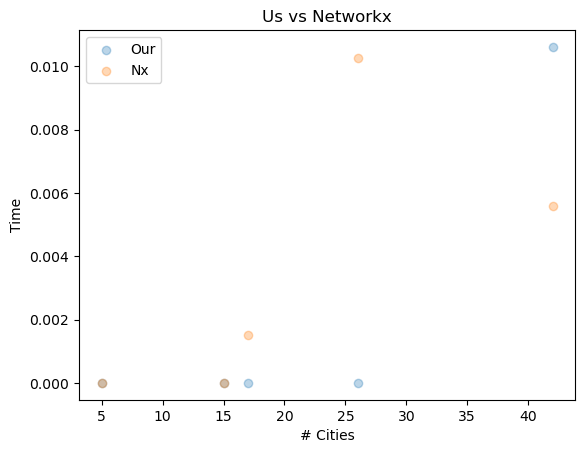

In [93]:
mst_analysis(G_list)

In [94]:
nx_vs_us_analysis(G_list, answers)

[(3, 0), (1, 0), (4, 1), (2, 0), (0, 3), (2, 4)]
[(11, 13), (2, 11), (9, 11), (7, 9), (1, 7), (12, 1), (14, 1), (8, 14), (4, 8), (0, 12), (5, 7), (3, 5), (10, 3), (6, 2), (7, 1), (0, 10), (13, 11), (6, 4)]
[(2, 14), (13, 14), (16, 13), (6, 16), (7, 6), (5, 7), (12, 6), (3, 12), (0, 12), (10, 2), (4, 10), (9, 10), (8, 3), (11, 8), (15, 11), (1, 4), (15, 0), (12, 6), (5, 10), (9, 1)]
[(22, 24), (21, 22), (20, 21), (25, 21), (16, 20), (17, 16), (19, 17), (18, 19), (15, 18), (8, 15), (9, 8), (10, 9), (12, 10), (11, 12), (13, 9), (14, 13), (2, 13), (6, 8), (7, 6), (4, 6), (5, 4), (3, 4), (1, 2), (23, 22), (0, 14), (4, 5), (6, 7), (9, 8), (13, 11), (21, 25), (23, 22), (24, 0)]


NetworkXError: G is not Eulerian.

In [ ]:
test_edge = [(4, 10), (2, 10), (14, 2), (13, 14), (16, 13), (6, 16), (7, 6), (5, 7), (12, 6), (3, 12), (0, 12), (9, 10), (8, 3), (11, 8), (15, 11), (1, 4), (5, 12), (15, 0), (6, 9)]
test_G = nx.Graph()
test_G.add_edges_from(test_edge)

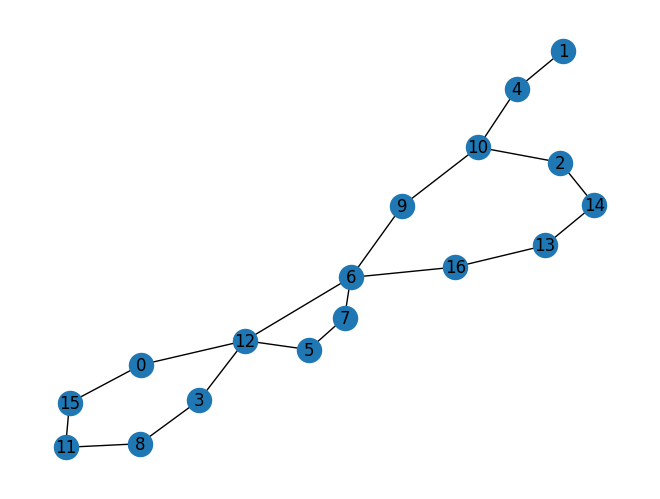

In [323]:
nx.draw(test_G, with_labels=True)